In [1]:
!gdown 1Q1WhNBSNDWTJdPM2M-gYvvZMo_3sMws6

Downloading...
From: https://drive.google.com/uc?id=1Q1WhNBSNDWTJdPM2M-gYvvZMo_3sMws6
To: C:\Users\Asus\my python\DSML\walmart.csv

  0%|          | 0.00/23.0M [00:00<?, ?B/s]
  2%|2         | 524k/23.0M [00:00<00:04, 4.79MB/s]
  9%|9         | 2.10M/23.0M [00:00<00:02, 9.63MB/s]
 20%|##        | 4.72M/23.0M [00:00<00:01, 15.9MB/s]
 30%|##9       | 6.82M/23.0M [00:00<00:01, 14.7MB/s]
 36%|###6      | 8.39M/23.0M [00:00<00:01, 14.0MB/s]
 43%|####3     | 9.96M/23.0M [00:00<00:00, 13.5MB/s]
 50%|#####     | 11.5M/23.0M [00:00<00:00, 13.2MB/s]
 57%|#####6    | 13.1M/23.0M [00:00<00:00, 13.0MB/s]
 64%|######3   | 14.7M/23.0M [00:01<00:00, 12.9MB/s]
 71%|#######   | 16.3M/23.0M [00:01<00:00, 12.8MB/s]
 77%|#######7  | 17.8M/23.0M [00:01<00:00, 13.2MB/s]
 84%|########4 | 19.4M/23.0M [00:01<00:00, 12.5MB/s]
 91%|#########1| 21.0M/23.0M [00:01<00:00, 12.1MB/s]
 98%|#########7| 22.5M/23.0M [00:01<00:00, 12.2MB/s]
100%|##########| 23.0M/23.0M [00:01<00:00, 12.8MB/s]


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm,binom

In [3]:
df = pd.read_csv("walmart.csv")
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969
...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,365


In [4]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,23961.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


It looks like there are no missing records in this data set.

In [6]:
df_new = df.copy()
df_new.groupby(["Gender"])["Purchase"].mean()

Gender
F    8734.565765
M    9437.526040
Name: Purchase, dtype: float64

The sample average per transaction of Male customers is more than Female customers, but we have to make sure if this is true for the whole population.

In [7]:
# male = df[df["Gender"]=="M"]
# female = df[df["Gender"]=="F"]
# sns.kdeplot(data = male,x="Purchase")

C:\Users\Asus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Purchase'>

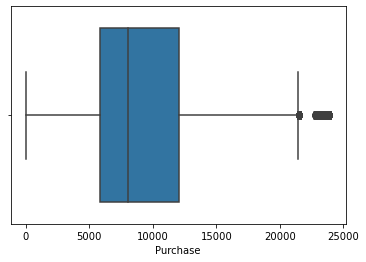

In [8]:
sns.boxplot(df["Purchase"])

There are some outliers in the Purchase feature of the data set.

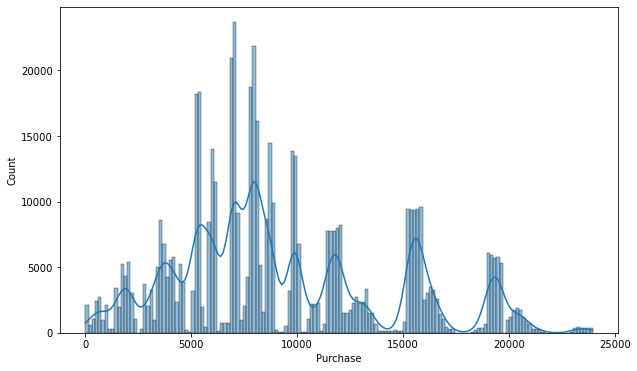

In [9]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Purchase', kde=True)
plt.show()

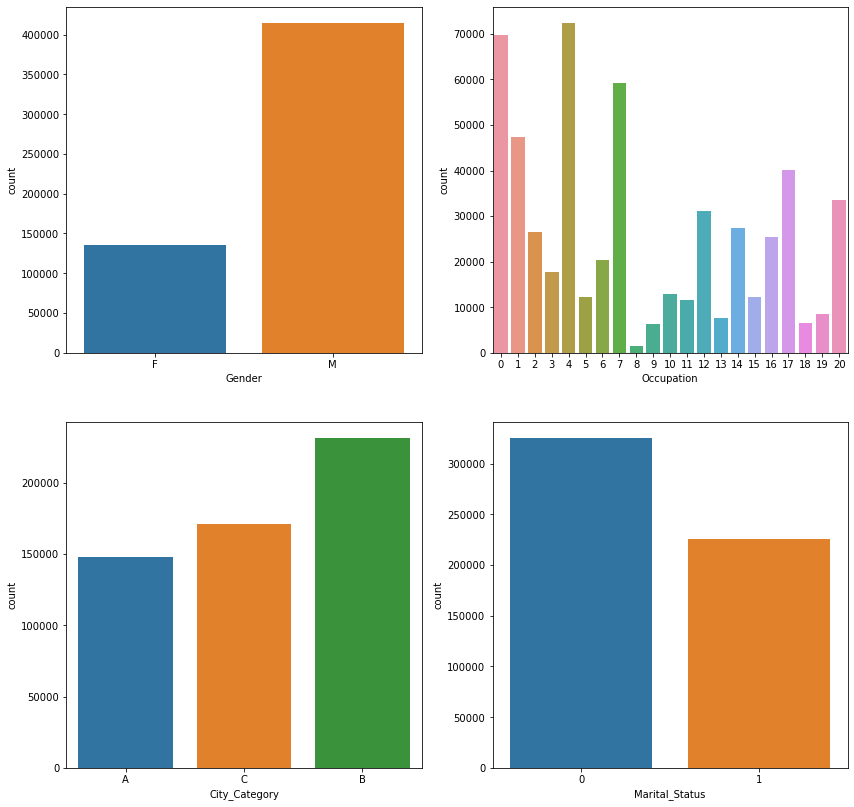

In [10]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 14))
sns.countplot(data=df, x='Gender', ax=axes[0,0])
sns.countplot(data=df, x='Occupation', ax=axes[0,1])
sns.countplot(data=df, x='City_Category', ax=axes[1,0])
sns.countplot(data=df, x='Marital_Status', ax=axes[1,1])
plt.show()


In [11]:
df["Marital_Status"].value_counts(normalize=True)*100

0    59.034701
1    40.965299
Name: Marital_Status, dtype: float64

In [12]:
df["Gender"].value_counts(normalize=True)*100

M    75.310507
F    24.689493
Name: Gender, dtype: float64

The above plots are self explanatory. 
- We see the given sample has more data from male population and Unmarried people.
- There are 20 different occupations.
- Almost 60% are unmarried and 40% are married.
- 75% are Men and 25% are Women

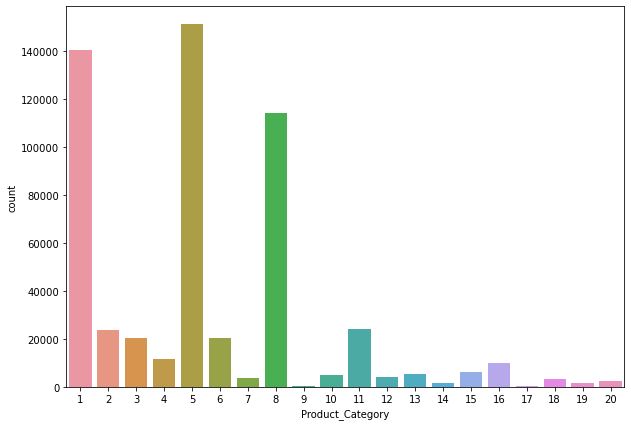

In [13]:
plt.figure(figsize=(10, 7))
sns.countplot(data=df, x='Product_Category')
plt.show()

- There are 20 different product category
- Product Category 1,5 and 8 have the highest purchasing frequency

In [14]:
plotData = df['Age'].value_counts(normalize=True)*100
plotData

26-35    39.919974
36-45    19.999891
18-25    18.117760
46-50     8.308246
51-55     6.999316
55+       3.909335
0-17      2.745479
Name: Age, dtype: float64

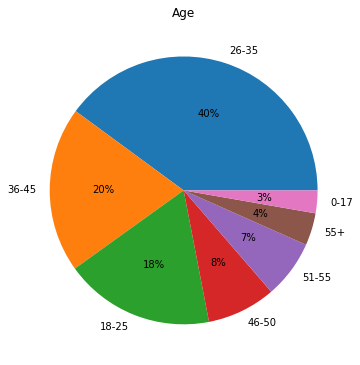

In [15]:
plt.figure(figsize=(6,7))
plt.pie(x=plotData.values, labels=plotData.index, autopct='%.0f%%')
plt.title("Age")
plt.show()

Almost 40% from the sample are between age 26-35 followed bu 35-45 with almost 20% and 18% are 18-25.

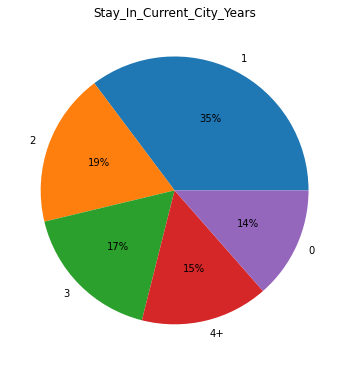

In [16]:
plt.figure(figsize=(6,7))
data = df['Stay_In_Current_City_Years'].value_counts(normalize=True)*100
plt.pie(x=data.values, labels=data.index, autopct='%.0f%%')
plt.title("Stay_In_Current_City_Years")
plt.show()

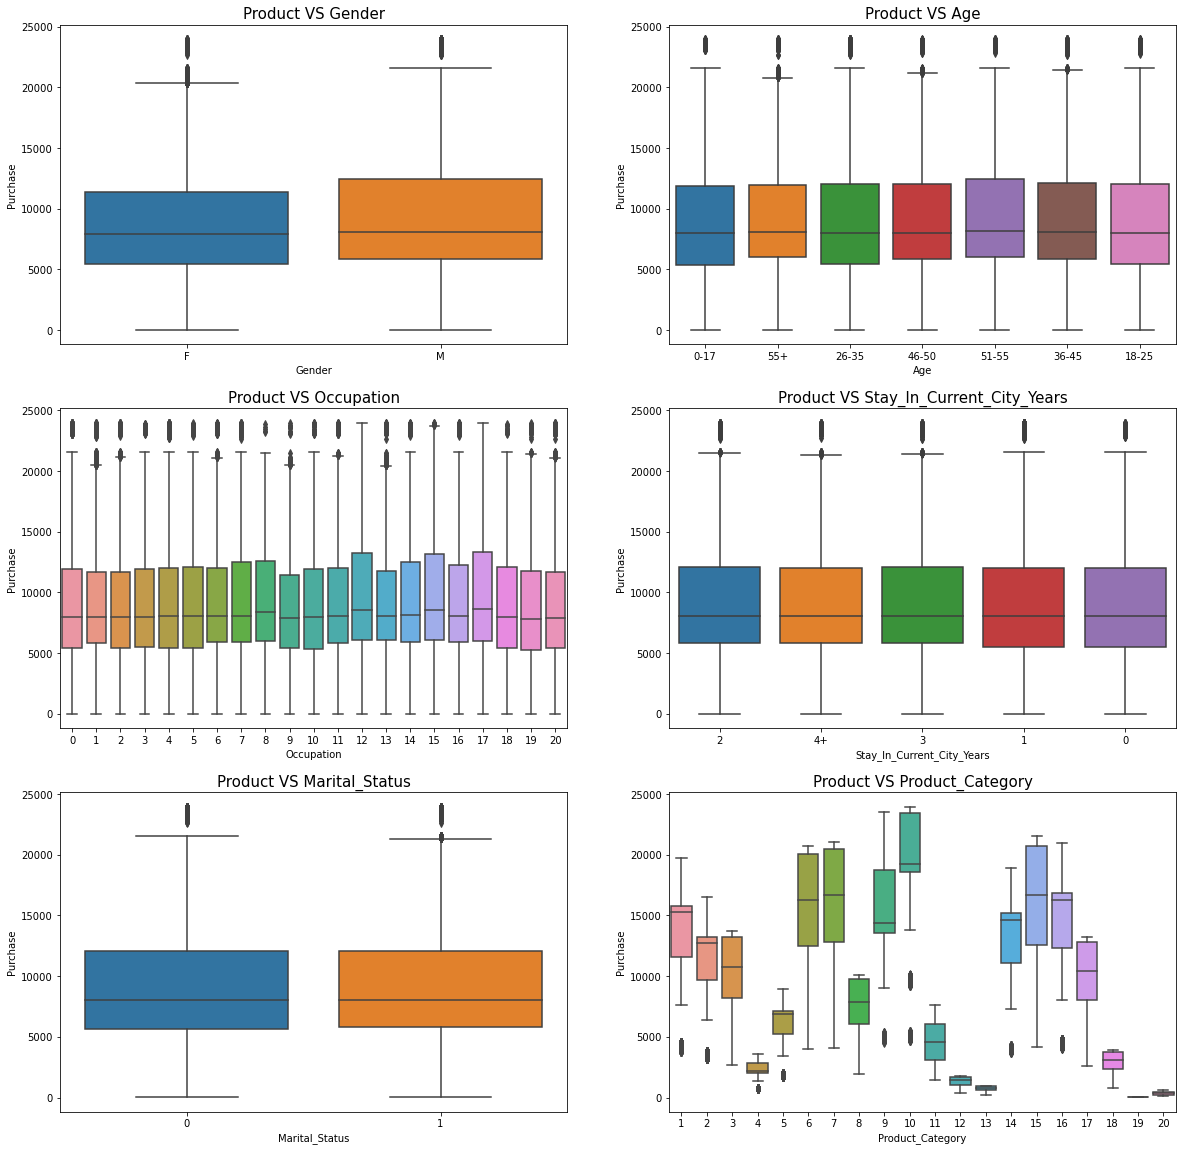

In [17]:
columns = ['Gender', 'Age', 'Occupation', 'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category']

fig,axes = plt.subplots(nrows=3,ncols =2,figsize=(20,20))
k = 0
for i in range(3):
    for j in range(2):
        sns.boxplot(data = df,y="Purchase",x=columns[k],ax=axes[i,j])
        axes[i,j].set_title(f"Product VS {columns[k]}",fontsize=15)
        k+=1
plt.show()

- For the first 5 boxplots ['Gender', 'Age', 'Occupation', 'City_Category', 'Stay_In_Current_City_Years'] therer is no significant difference in the median but they differ slightly in Inter Quartile Range.
- In the last plot Product Category, We see a hige difference in median values for each category.
- All these bivariate plots show the presence of outliers.

In [18]:
columns = ['Gender', 'Age', 'Occupation', 'City_Category', 'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category']
df_new[columns].melt().groupby(['variable', 'value'])[['value']].count()/len(df_new)

value
variable                   value          
Age                        0-17   0.027455
                           18-25  0.181178
                           26-35  0.399200
                           36-45  0.199999
                           46-50  0.083082
                           51-55  0.069993
                           55+    0.039093
City_Category              A      0.268549
                           B      0.420263
                           C      0.311189
Gender                     F      0.246895
                           M      0.753105
Marital_Status             0      0.590347
                           1      0.409653
Occupation                 0      0.126599
                           1      0.086218
                           2      0.048336
                           3      0.032087
                           4      0.131453
                           5      0.022137
                           6      0.037005
                           7      0.107501
                           8      0.002811
                           9      0.011437
                           10     0.023506
                           11     0.021063
                           12     0.056682
                           13     0.014049
                           14     0.049647
                           15     0.022115
                           16     0.046123
                           17     0.072796
                           18     0.012039
                           19     0.015382
                           20     0.061014
Product_Category           1      0.255201
                           2      0.043384
                           3      0.036746
                           4      0.021366
                           5      0.274390
                           6      0.037206
                           7      0.006765
                           8      0.207111
                           9      0.000745
                           10     0.009317
                           11     0.044153
                           12     0.007175
                           13     0.010088
                           14     0.002769
                           15     0.011435
                           16     0.017867
                           17     0.001051
                           18     0.005681
                           19     0.002914
                           20     0.004636
Stay_In_Current_City_Years 0      0.135252
                           1      0.352358
                           2      0.185137
                           3      0.173224
                           4+     0.154028

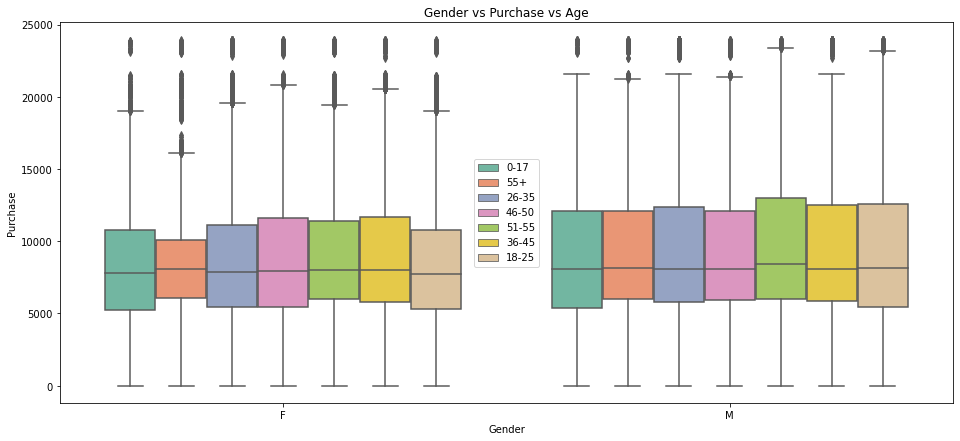

In [19]:
plt.figure(figsize=(16,7))
sns.boxplot(data=df, y='Purchase', x='Gender', hue='Age', palette='Set2')
plt.legend(loc='center')
plt.title("Gender vs Purchase vs Age")
plt.show()

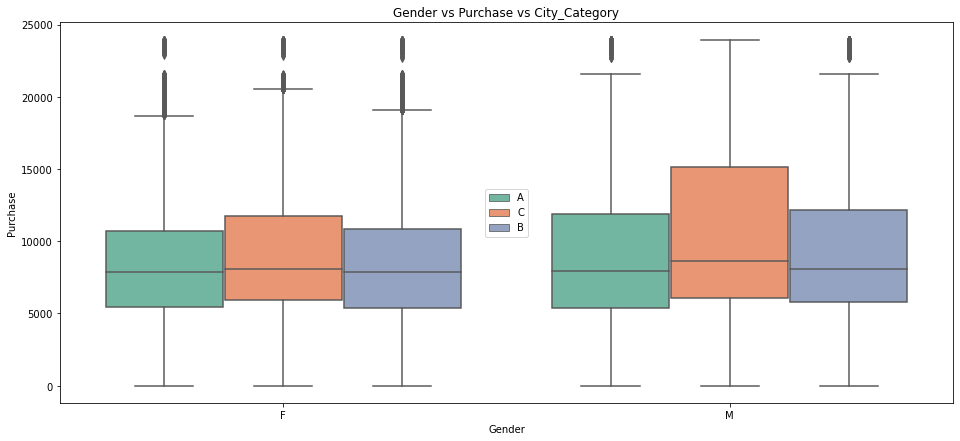

In [20]:
plt.figure(figsize=(16,7))
sns.boxplot(data=df, y='Purchase', x='Gender', hue='City_Category', palette='Set2')
plt.legend(loc='center')
plt.title("Gender vs Purchase vs City_Category")

plt.show()

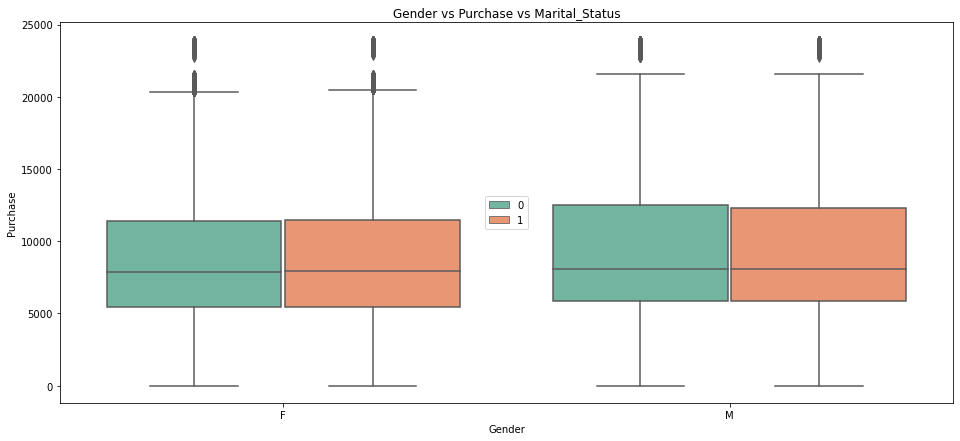

In [21]:
plt.figure(figsize=(16,7))
sns.boxplot(data=df, y='Purchase', x='Gender', hue='Marital_Status', palette='Set2')
plt.legend(loc='center')
plt.title("Gender vs Purchase vs Marital_Status")

plt.show()

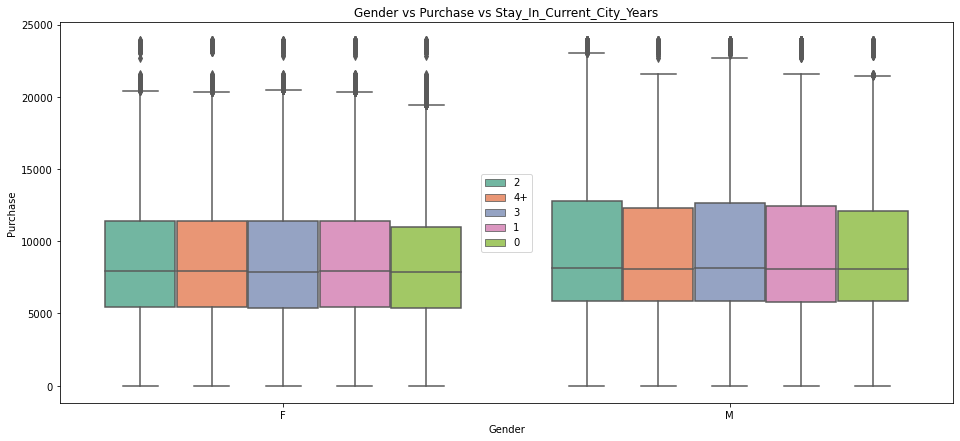

In [22]:
plt.figure(figsize=(16,7))
sns.boxplot(data=df, y='Purchase', x='Gender', hue='Stay_In_Current_City_Years', palette='Set2')
plt.legend(loc='center')
plt.title("Gender vs Purchase vs Stay_In_Current_City_Years")

plt.show()

In [23]:
sample_df = df_new.groupby(['User_ID', 'Gender'])[['Purchase']].sum()
sample_df = sample_df.reset_index()
sample_df

,User_ID,Gender,Purchase
0,1000001,F,334093
1,1000002,M,810472
2,1000003,M,341635
3,1000004,M,206468
4,1000005,M,821001
...,...,...,...
5886,1006036,F,4116058
5887,1006037,F,1119538
5888,1006038,F,90034
5889,1006039,F,590319


In [24]:
sample_df["Gender"].value_counts()

M    4225
F    1666
Name: Gender, dtype: int64

**Average amount spent per customer - Male vs Female**

In [25]:
male = sample_df[sample_df['Gender']=='M']
female = sample_df[sample_df['Gender']=='F']


In [26]:
male_mean = []
female_mean=[]
male_samples = 2000
female_samples=1000
for i in range(1000):
    male_mean.append(male.sample(male_samples)["Purchase"].mean())
    female_mean.append(female.sample(female_samples)["Purchase"].mean())
    



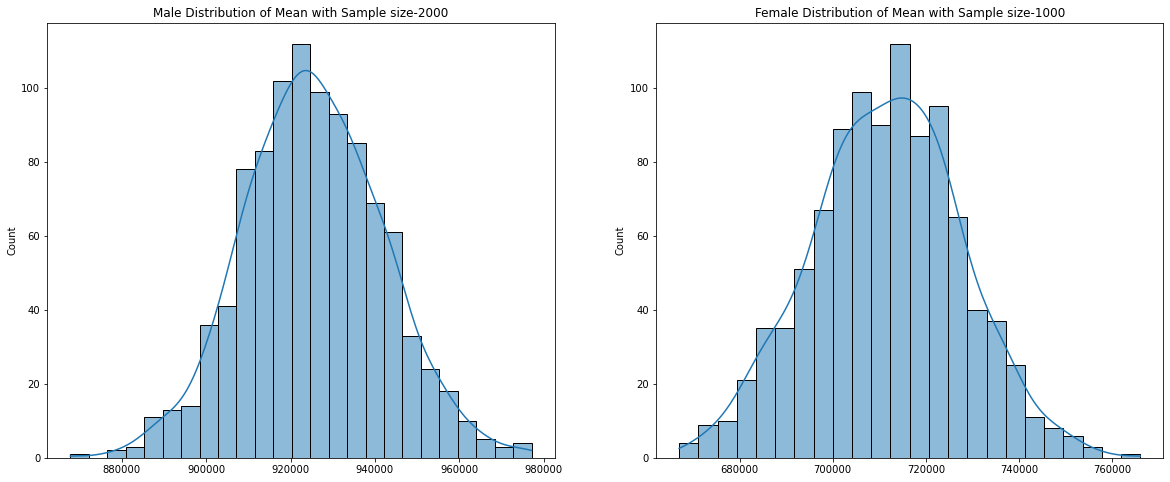

In [27]:
fig,axes = plt.subplots(nrows=1,ncols=2,figsize=(20,8))

sns.histplot(male_mean,kde=True,ax=axes[0])
sns.histplot(female_mean,kde=True,ax=axes[1])
axes[0].set_title("Male Distribution of Mean with Sample size-2000")
axes[1].set_title("Female Distribution of Mean with Sample size-1000")
plt.show()

In [28]:
print(f"Male Sample mean of {male_samples} samples is {round(np.mean(male_mean),2)} with standard deaviation {np.std(male_mean)}")
print(f"Male Population mean is {round(male['Purchase'].mean(),2)}")
print()
print(f"Female Sample mean of {female_samples} samples is {round(np.mean(female_mean),2)} with standard deaviation {np.std(female_mean)}")
print(f"Male Population mean is {round(female['Purchase'].mean(),2)}")

Male Sample mean of 2000 samples is 925468.2 with standard deaviation 16458.7752944422
Male Population mean is 925344.4

Female Sample mean of 1000 samples is 711532.68 with standard deaviation 16048.41970747538
Male Population mean is 712024.39


Our initial observation is that male spend money in an average than females

**Confidence interval - 90%**

In [29]:
male_std_error = male["Purchase"].std()/np.sqrt(len(male))
male_mean_val= male["Purchase"].mean() 
# for 90% confidance interval 
z1=norm.ppf(0.05)
z2 =norm.ppf(0.95)
male_lower_limit = male_mean_val + z1*male_std_error
male_upper_limit = male_mean_val + z2*male_std_error
male_lower_limit,male_upper_limit
print(f"We can say with 90% confidence that male average purchase will be between {male_lower_limit} and {male_upper_limit}")



female_std_error = female["Purchase"].std()/np.sqrt(len(female))
female_mean_val= female["Purchase"].mean() 
# for 90% confidance interval 
z1=norm.ppf(0.05)
z2 =norm.ppf(0.95)
female_lower_limit = female_mean_val + z1*female_std_error
female_upper_limit = female_mean_val + z2*female_std_error
female_lower_limit,female_upper_limit
print(f"We can say with 90% confidence that female average purchase will be between {female_lower_limit} and {female_upper_limit}")

We can say with 90% confidence that male average purchase will be between 900397.5374922296 and 950291.2672414982
We can say with 90% confidence that female average purchase will be between 679488.5000316962 and 744560.2898842702


**Confidence interval - 95%**

In [30]:
male_std_error = male["Purchase"].std()/np.sqrt(len(male))
male_mean_val= male["Purchase"].mean() 
# for 95% confidance interval 
z1=norm.ppf(0.025)
z2 =norm.ppf(0.975)
male_lower_limit = male_mean_val + z1*male_std_error
male_upper_limit = male_mean_val + z2*male_std_error
male_lower_limit,male_upper_limit
print(f"We can say with 95% confidence that male average purchase will be between {male_lower_limit} and {male_upper_limit}")



female_std_error = female["Purchase"].std()/np.sqrt(len(female))
female_mean_val= female["Purchase"].mean() 
# for 95% confidance interval 
z1=norm.ppf(0.025)
z2 =norm.ppf(0.975)
female_lower_limit = female_mean_val + z1*female_std_error
female_upper_limit = female_mean_val + z2*female_std_error
female_lower_limit,female_upper_limit
print(f"We can say with 95% confidence that female average purchase will be between {female_lower_limit} and {female_upper_limit}")

We can say with 95% confidence that male average purchase will be between 895618.3794063339 and 955070.4253273939
We can say with 95% confidence that female average purchase will be between 673255.4849374058 and 750793.3049785605


After applying CLT we can conclude that 
- Male customer's spending average is 926221.25
- Feamle customer's spending average is 710452.06

**Average amount spent per customer - Married vs Unmarried**

In [31]:
sample_df = df_new.groupby(['User_ID', 'Marital_Status'])[['Purchase']].sum()
sample_df = sample_df.reset_index()
sample_df

,User_ID,Marital_Status,Purchase
0,1000001,0,334093
1,1000002,0,810472
2,1000003,0,341635
3,1000004,1,206468
4,1000005,1,821001
...,...,...,...
5886,1006036,1,4116058
5887,1006037,0,1119538
5888,1006038,0,90034
5889,1006039,1,590319


In [32]:
sample_df["Marital_Status"].value_counts()

0    3417
1    2474
Name: Marital_Status, dtype: int64

In [33]:
married = sample_df[sample_df['Marital_Status']==1]
unmarried = sample_df[sample_df['Marital_Status']==0]

In [34]:
married

,User_ID,Marital_Status,Purchase
3,1000004,1,206468
4,1000005,1,821001
6,1000007,1,234668
7,1000008,1,796593
9,1000010,1,2169510
...,...,...,...
5879,1006029,1,157436
5880,1006030,1,737361
5883,1006033,1,501843
5886,1006036,1,4116058


In [35]:
married_mean = []
unmarried_mean=[]
married_samples = 2000
unmarried_samples=3000
for i in range(1000):
    married_mean.append(married.sample(married_samples)["Purchase"].mean())
    unmarried_mean.append(unmarried.sample(unmarried_samples)["Purchase"].mean())

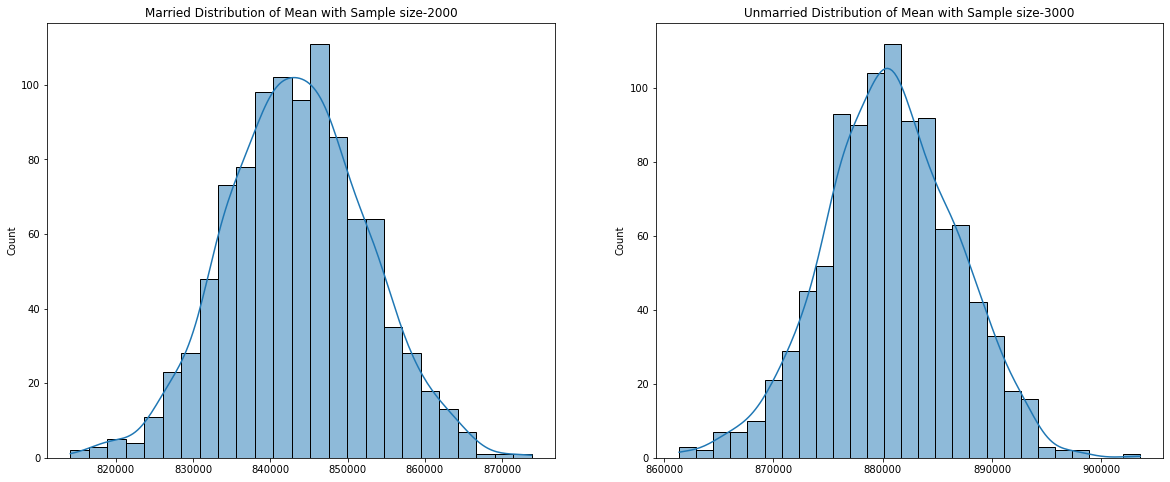

In [36]:
fig,axes = plt.subplots(nrows=1,ncols=2,figsize=(20,8))

sns.histplot(married_mean,kde=True,ax=axes[0])
sns.histplot(unmarried_mean,kde=True,ax=axes[1])
axes[0].set_title("Married Distribution of Mean with Sample size-2000")
axes[1].set_title("Unmarried Distribution of Mean with Sample size-3000")
plt.show()

In [37]:
print(f"married Sample mean of {married_samples} samples is {round(np.mean(married_mean),2)} with standard deaviation {np.std(married_mean)}")
print(f"married Population mean is {round(married['Purchase'].mean(),2)}")
print()
print(f"Unmarried Sample mean of {unmarried_samples} samples is {round(np.mean(unmarried_mean),2)} with standard deaviation {np.std(unmarried_mean)}")
print(f"Unmarried Population mean is {round(unmarried['Purchase'].mean(),2)}")

married Sample mean of 2000 samples is 843402.49 with standard deaviation 9074.81089072232
married Population mean is 843526.8

Unmarried Sample mean of 3000 samples is 880687.44 with standard deaviation 6042.732291796565
Unmarried Population mean is 880575.78


Initial Observation - Married spending avg is less than unmarried

In [38]:
married_std_error = married["Purchase"].std()/np.sqrt(len(married))
married_mean_val= married["Purchase"].mean() 
# for 95% confidance interval 
z1=norm.ppf(0.05)
z2 =norm.ppf(0.95)
married_lower_limit = married_mean_val + z1*married_std_error
married_upper_limit = married_mean_val + z2*married_std_error
married_lower_limit,married_upper_limit
print(f"We can say with 90% confidence that married person's average purchase will be between {round(married_lower_limit,2)} and {round(married_upper_limit,2)}")


unmarried_std_error = unmarried["Purchase"].std()/np.sqrt(len(unmarried))
unmarried_mean_val= unmarried["Purchase"].mean() 
# for 90% confidance interval 
z1=norm.ppf(0.05)
z2 =norm.ppf(0.95)
unmarried_lower_limit = unmarried_mean_val + z1*unmarried_std_error
unmarried_upper_limit = unmarried_mean_val + z2*unmarried_std_error
unmarried_lower_limit,unmarried_upper_limit
print(f"We can say with 90% confidence that unmarried average purchase will be between {round(unmarried_lower_limit,2)} and {round(unmarried_upper_limit,2)}")

We can say with 90% confidence that married person's average purchase will be between 812595.19 and 874458.41
We can say with 90% confidence that unmarried average purchase will be between 853859.83 and 907291.73


**we see a overlap in 90% confidence interval.**

In [39]:
married_std_error = married["Purchase"].std()/np.sqrt(len(married))
married_mean_val= married["Purchase"].mean() 
# for 95% confidance interval 
z1=norm.ppf(0.025)
z2 =norm.ppf(0.975)
married_lower_limit = married_mean_val + z1*married_std_error
married_upper_limit = married_mean_val + z2*married_std_error
married_lower_limit,married_upper_limit
print(f"We can say with 95% confidence that married person's average purchase will be between {married_lower_limit} and {married_upper_limit}")


unmarried_std_error = unmarried["Purchase"].std()/np.sqrt(len(unmarried))
unmarried_mean_val= unmarried["Purchase"].mean() 
# for 95% confidance interval 
z1=norm.ppf(0.025)
z2 =norm.ppf(0.975)
unmarried_lower_limit = unmarried_mean_val + z1*unmarried_std_error
unmarried_upper_limit = unmarried_mean_val + z2*unmarried_std_error
unmarried_lower_limit,unmarried_upper_limit
print(f"We can say with 95% confidence that unmarried average purchase will be between {unmarried_lower_limit} and {unmarried_upper_limit}")

We can say with 95% confidence that married person's average purchase will be between 806669.5086715257 and 880384.0846995333
We can say with 95% confidence that unmarried average purchase will be between 848741.7674019644 and 912409.7965430166


**we see a overlap in 95% confidence interval as well.**

**So we can conclude that the our initial assumption i.e., married avg > unmarried is stastically insignificant**

In [40]:
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969
...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,365


In [41]:
sample_df = df.groupby(["User_ID","Age"])["Purchase"].sum()
sample_df=sample_df.reset_index()

In [42]:
type(sample_df.loc[0,"Age"])

str

In [43]:
sample_df["Age"].value_counts()

26-35    2053
36-45    1167
18-25    1069
46-50     531
51-55     481
55+       372
0-17      218
Name: Age, dtype: int64

In [44]:
bins = sample_df["Age"].value_counts().index

In [45]:
mean_values = {}
for i in bins:
    mean_values[i] = []
    
sample_size = 210
reps = 1000
for i in bins:
    for _ in range(reps):
        mean = sample_df[sample_df["Age"]==i].sample(sample_size)["Purchase"].mean()
        mean_values[i].append(mean)
        


**90% confidence interval**

In [46]:
for key in mean_values.keys():
    std_err=np.std(mean_values[key])/np.sqrt(len(mean_values[key]))
    mean = np.mean(mean_values[key])
  
    # for 90% confidance interval 
    z1=norm.ppf(0.05)
    z2 =norm.ppf(0.95)
    lower_limit = mean + z1*std_err
    upper_limit = mean + z2*std_err
    print(f"90% confidence interval for {key} is in between {round(lower_limit,2)} and {round(upper_limit,2)}")

90% confidence interval for 26-35 is in between 985682.26 and 992405.72
90% confidence interval for 36-45 is in between 878916.26 and 885446.21
90% confidence interval for 18-25 is in between 853348.45 and 858885.47
90% confidence interval for 46-50 is in between 788274.83 and 793322.34
90% confidence interval for 51-55 is in between 760903.45 and 765162.67
90% confidence interval for 55+ is in between 538213.84 and 541120.79
90% confidence interval for 0-17 is in between 618861.27 and 619772.2


**- 90% confidence interval for 26-35 is in between 986664.24 and 993723.04**<br>
**- 90% confidence interval for 36-45 is in between 876905.21 and 883326.95**<br>
**- 90% confidence interval for 18-25 is in between 851753.55 and 857307.14**<br>
**- 90% confidence interval for 46-50 is in between 788735.45 and 793713.48**<br>
**- 90% confidence interval for 51-55 is in between 760912.41 and 765087.47**<br>
**- 90% confidence interval for 55+ is in between 538834.71 and 541737.37**<br>
**- 90% confidence interval for 0-17 is in between 617777.66 and 618764.37**<br>

**95% confidence interval**

In [47]:

for key in mean_values.keys():
    std_err=np.std(mean_values[key])/np.sqrt(len(mean_values[key]))
    mean = np.mean(mean_values[key])
  
    # for 95% confidance interval 
    z1=norm.ppf(0.025)
    z2 =norm.ppf(0.975)
    lower_limit = mean + z1*std_err
    upper_limit = mean + z2*std_err
    print(f"95% confidence interval for {key} is in between {round(lower_limit,2)} and {round(upper_limit,2)}")

95% confidence interval for 26-35 is in between 985038.24 and 993049.73
95% confidence interval for 36-45 is in between 878290.78 and 886071.69
95% confidence interval for 18-25 is in between 852818.07 and 859415.85
95% confidence interval for 46-50 is in between 787791.34 and 793805.83
95% confidence interval for 51-55 is in between 760495.47 and 765570.65
95% confidence interval for 55+ is in between 537935.39 and 541399.24
95% confidence interval for 0-17 is in between 618774.02 and 619859.46


**- 95% confidence interval for 26-35 is in between 985988.1 and 994399.18**<br>
**- 95% confidence interval for 36-45 is in between 876290.09 and 883942.07**<br>
**- 95% confidence interval for 18-25 is in between 851221.59 and 857839.1**<br>
**- 95% confidence interval for 46-50 is in between 788258.62 and 794190.31**<br>
**- 95% confidence interval for 51-55 is in between 760512.49 and 765487.39**<br>
**- 95% confidence interval for 55+ is in between 538556.67 and 542015.41**<br>
**- 95% confidence interval for 0-17 is in between 617683.15 and 618858.89**<br>

<h1>Insights</h1>

- We see the given sample has more data from male population and Unmarried people.
- There are 20 different occupations.
- Almost 60% are unmarried and 40% are married.
- 75% are Men and 25% are Women
- There are 20 different product category
- Product Category 1,5 and 8 have the highest purchasing frequency
- Almost 40% from the sample are between age 26-35 followed bu 35-45 with almost 20% and 18% are 18-25.

# Recommendations

- Company should focus on acquiring and retaining male customers as their spending average is significantly high. 
- Unmarried customers spend more money than married customers, hence the company should focus on acquiring Unmarried customers.
- Product_Category 1, 5, 8 have highest purchasing rate.The products in these categories are liked more by customers. Company can focus on selling more of these products.
- Customers in the age 18-45 spend more money than the others, So company should focus on customers who are in the age 18-45.
